## Student Performance Indicator

### Problem Statment
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Source
Data - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

In [3]:
# Readind the file
df = pd.read_csv('data\students.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data Preparation

In [9]:
# Checking for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
# Checking for unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
# Summary statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- Central Tendency and Distribution: The average scores for math, reading, and writing are approximately 66.09, 69.17, and 68.05, respectively, indicating similar performance levels across the subjects. The scores show moderate variability, with standard deviations around 15, suggesting a fairly spread-out distribution of scores.

- Score Range and Extremes: The scores range from 0–100 for math, 17–100 for reading, and 10–100 for writing, showing potential outliers or very low-performing students in all subjects, particularly in math (minimum = 0).

- Quartile Insights: The 25th, 50th (median), and 75th percentiles indicate that half of the students scored between approximately 57 and 77 in math, 59 and 79 in reading, and 57.75 and 79 in writing, showing consistency in performance across the subjects.

### Exploring Data

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
print('Categories of the gender variable:',end=' ')
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories of the gender variable: ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [20]:
# define numerical and categorical columns
num_features = df.select_dtypes(include=[np.number]).columns
cat_features = df.select_dtypes(include=[object]).columns

In [23]:
print('No.of Numerical columns {} and Columns: {}'.format(len(num_features),num_features))
print('No.of Categorical columns {} and Columns: {}'.format(len(cat_features),cat_features))

No.of Numerical columns 3 and Columns: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
No.of Categorical columns 5 and Columns: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


#### Adding 'Total_Score' and 'Avg_Score'

In [25]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_Score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Avg_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
# rename Avg_Score to avg_score
df.rename(columns={'Avg_Score':'avg_score'}, inplace=True)

In [32]:
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()

print('No.of students who scored full in reading:',reading_full)
print('No.of students who scored full in writing:',writing_full)
print('No.of students who scored full in math:',math_full)

No.of students who scored full in reading: 17
No.of students who scored full in writing: 14
No.of students who scored full in math: 7


In [34]:
reading_full = df[df['reading_score'] < 20]['avg_score'].count()
writing_full = df[df['writing_score'] < 20]['avg_score'].count()
math_full = df[df['math_score'] < 20]['avg_score'].count()

print('No.of students who failed in reading:',reading_full)
print('No.of students who failed in writing:',writing_full)
print('No.of students who failed in math:',math_full)

No.of students who failed in reading: 1
No.of students who failed in writing: 3
No.of students who failed in math: 4



- From the above we can see that student perform well in Reading and bad in Maths

#### Exploring Data by Visualization

##### Visualizing the distribution of the avg_score

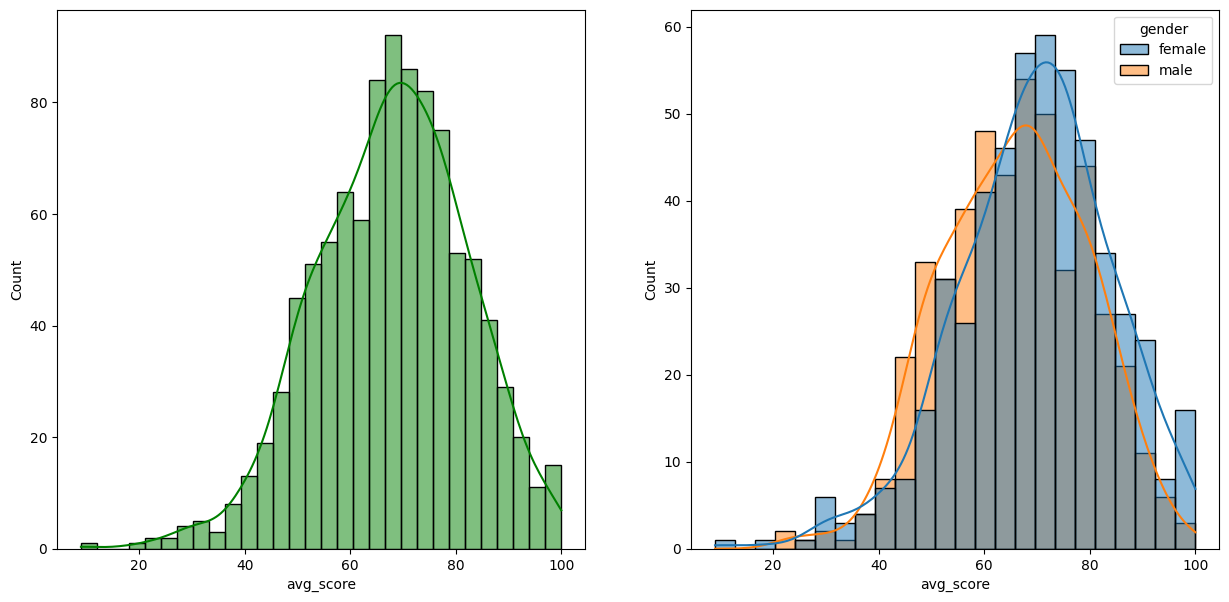

In [38]:
# Histogram & KDE

fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30 ,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

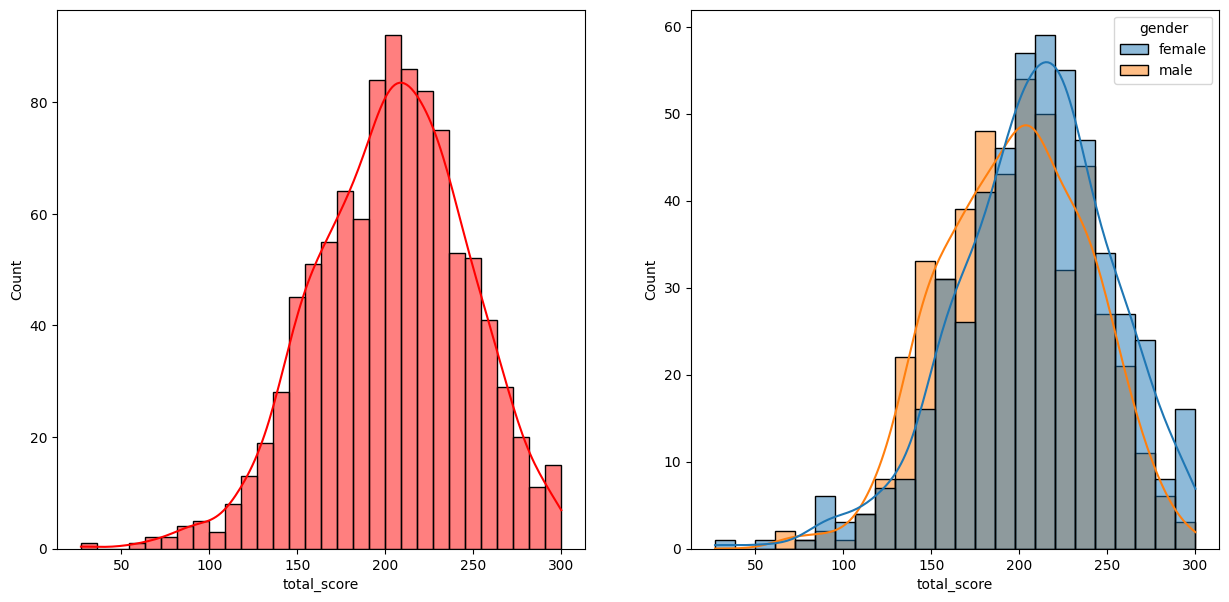

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30 ,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

- Female students seem to perform well than male

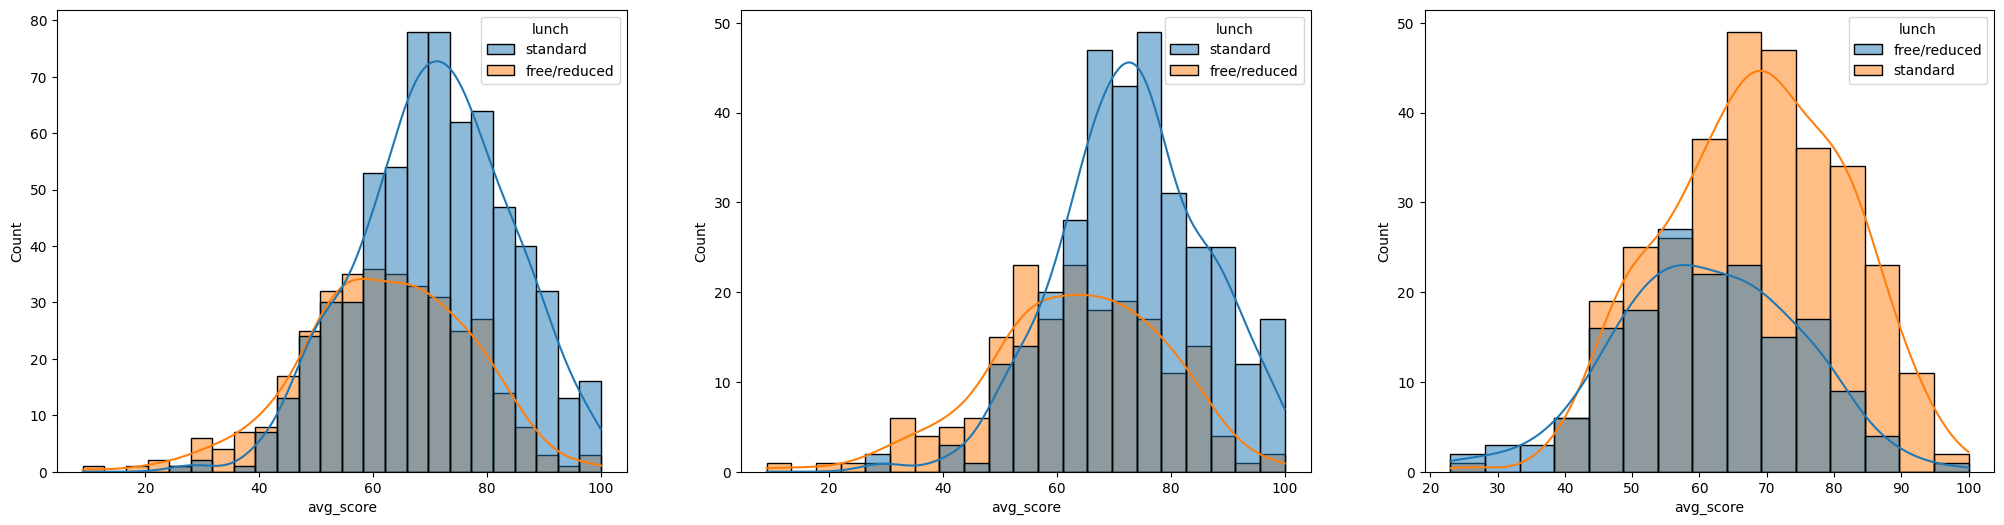

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

- Standard lunch seem to help student perform well for both male and female

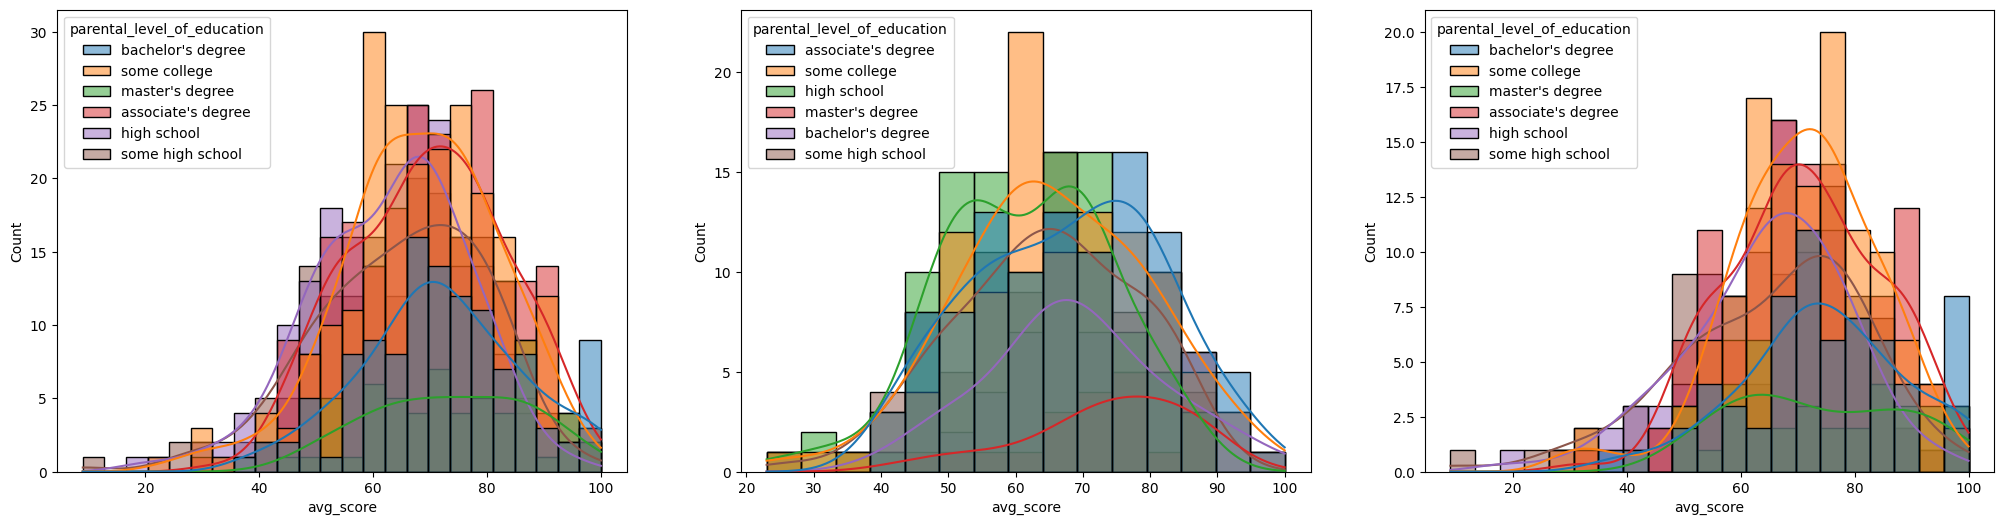

In [57]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax=sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')

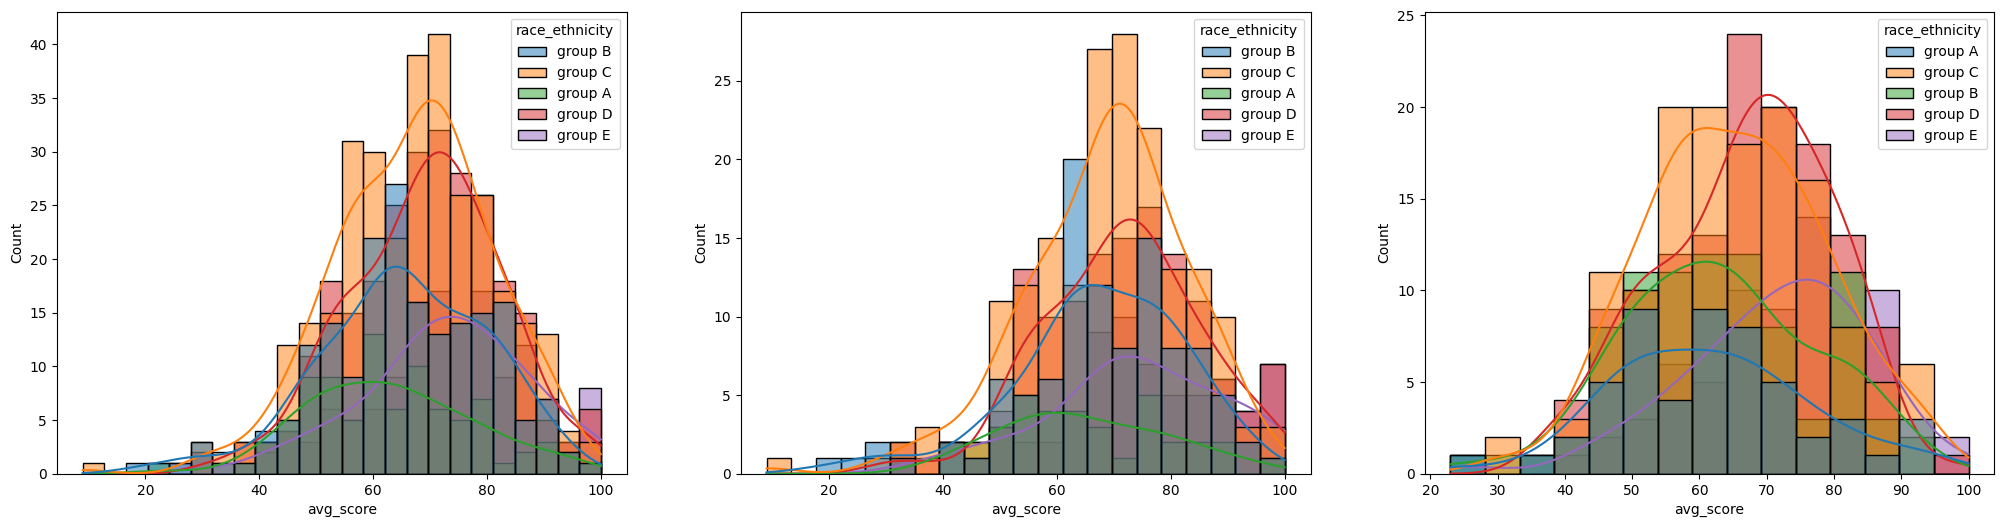

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

- Group A and B seem perform poorly in exam whether be it male or female.

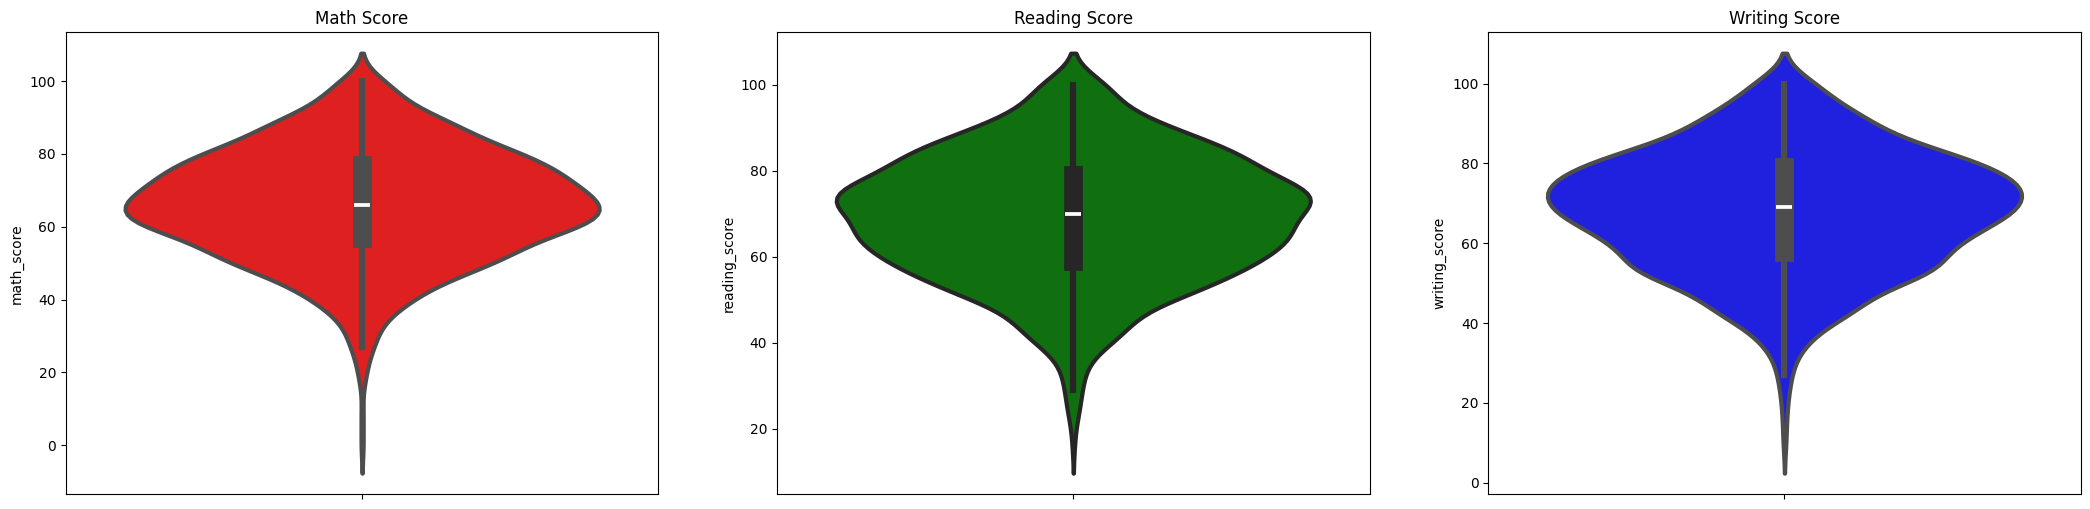

In [67]:
# Violin plot to check the distribution of maximum score of student in each subject
plt.figure(figsize=(26,6))
plt.subplot(131)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df,color='r',linewidth=3)
plt.subplot(132)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='g',linewidth=3)
plt.subplot(133)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='b',linewidth=3)
plt.show()

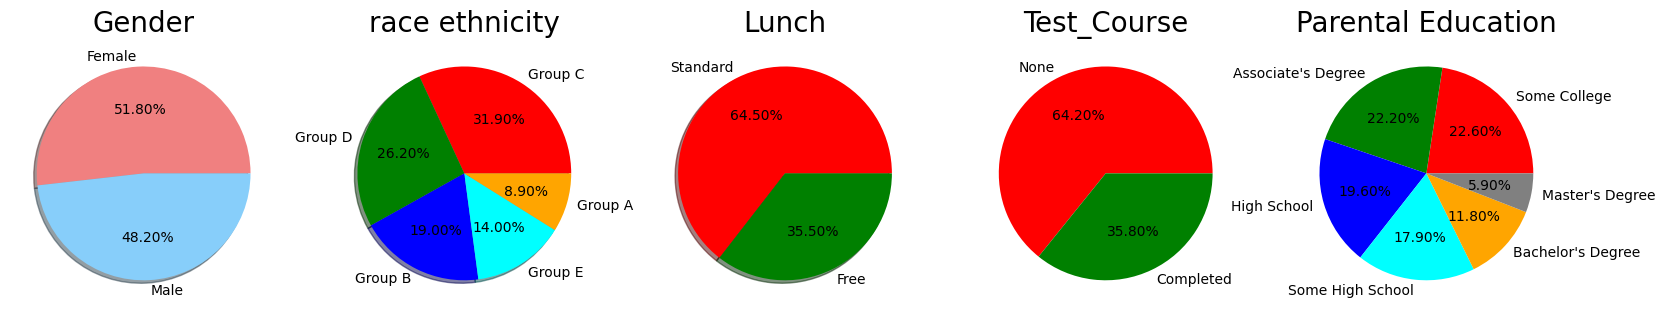

In [77]:
# Multivariate Analysis using pie chart

plt.figure(figsize=(20,6))
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female','Male'
colors = ['lightcoral', 'lightskyblue']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
plt.title('race ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(154)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test_Course', fontsize=20)
plt.axis('off')

plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.show()
